Descriptive Statistics:
              year         value
count  9542.000000  9.542000e+03
mean   2018.359883  2.331378e+05
std       4.590404  3.349828e+06
min    2010.000000  1.100000e-06
25%    2015.000000  7.600000e-01
50%    2019.000000  6.600000e+01
75%    2021.000000  3.800000e+03
max    2030.000000  1.800000e+08

Skewness:
year      0.337795
value    38.370419
dtype: float64

Kurtosis:
year        0.150672
value    1852.437105
dtype: float64


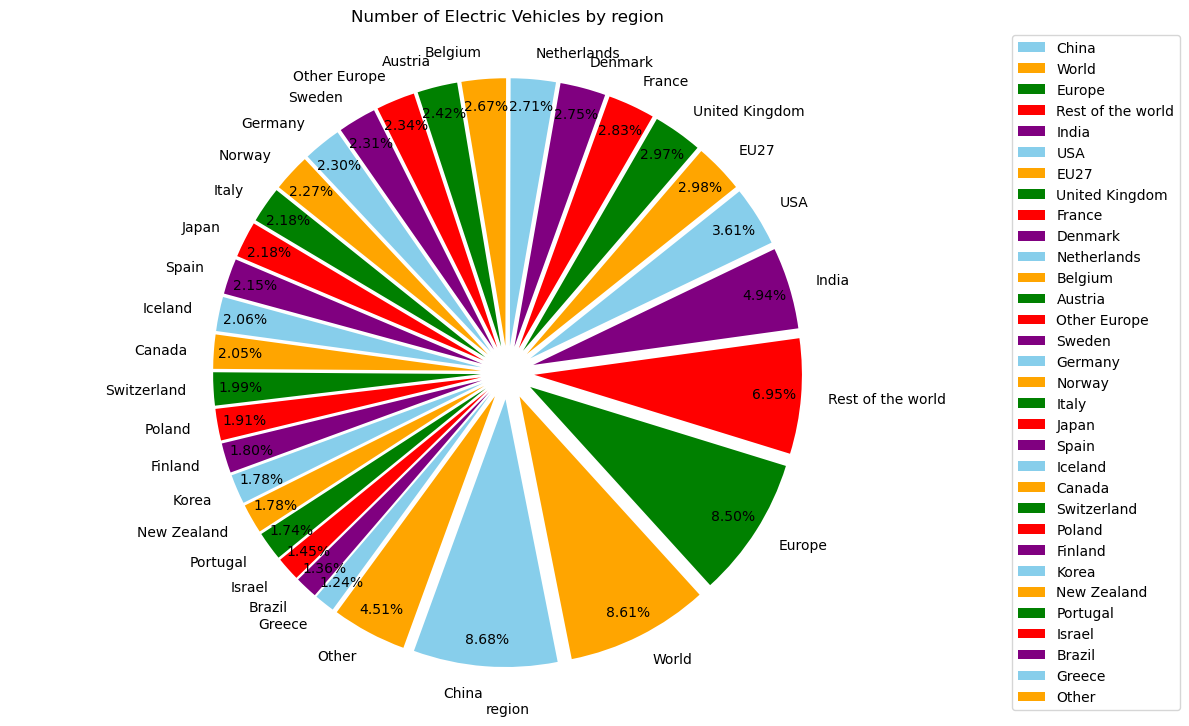

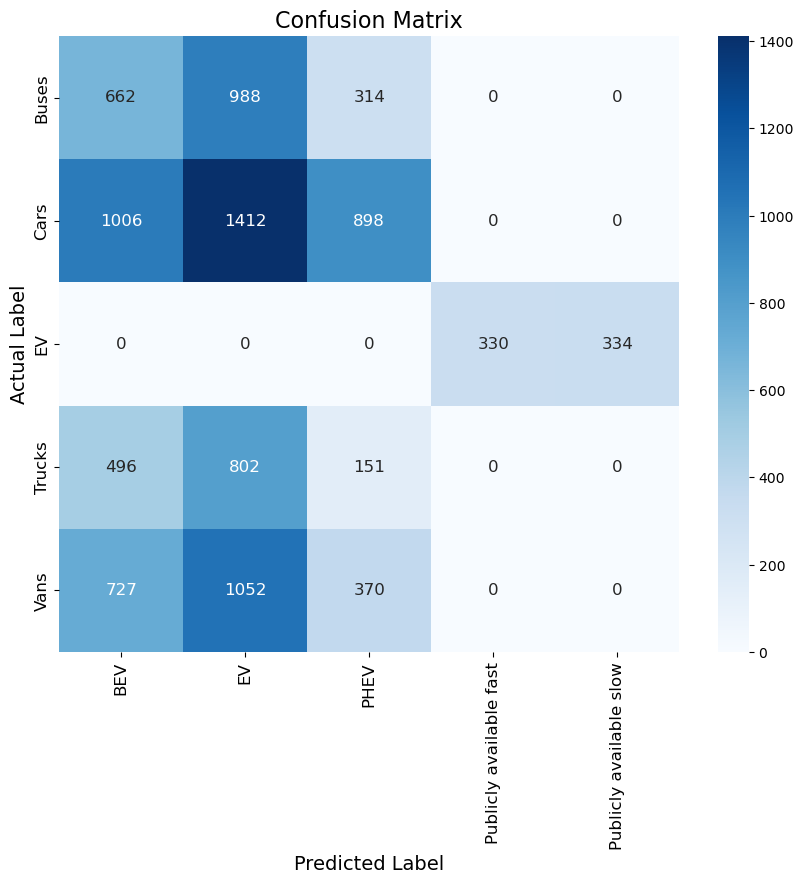


Correlation Matrix:
           year     value
year   1.000000  0.123621
value  0.123621  1.000000


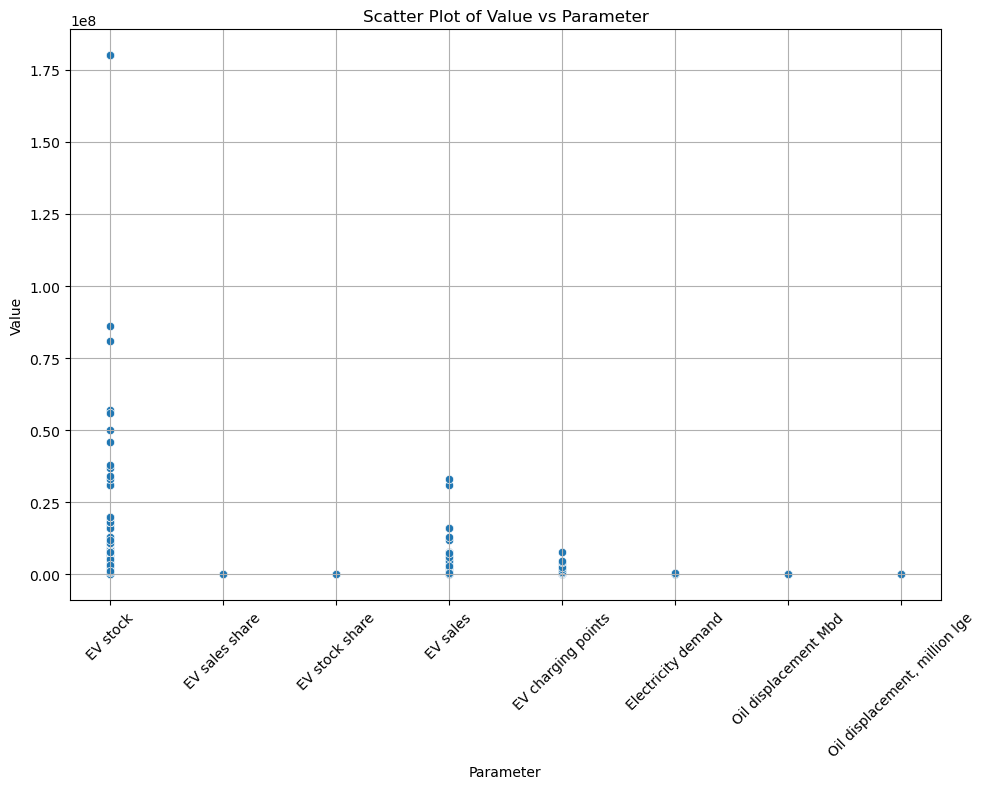

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Constants
DATA_FILE = 'Global EV 2023.csv'
SMALL_REGION_THRESHOLD = 0.01

# Load the dataset
ev_df = pd.read_csv(DATA_FILE)

# Describe the dataset to show major moments
print("Descriptive Statistics:")
print(ev_df.describe())

# Calculate and print skewness and kurtosis for numeric columns only
numeric_df = ev_df.select_dtypes(include=['int64', 'float64'])
print("\nSkewness:")
print(numeric_df.skew())

print("\nKurtosis:")
print(numeric_df.kurtosis())

# Define a function to create a bar chart
def plot_bar_chart(data, column):
    """
    Function to create a bar chart showing the distribution of electric vehicles by a specific category.
    
    Parameters:
        data (DataFrame): The DataFrame containing the data.
        column (str): The column representing the category to plot.
    """
    plt.figure(figsize=(12, 8))  # Increase figure size
    plt.subplots_adjust(top=0.8)  # Adjust the top margin

    counts = data[column].value_counts()
    
    # Combine small regions into an "Other" category
    small_regions = counts[counts / counts.sum() < SMALL_REGION_THRESHOLD].index
    counts['Other'] = counts[small_regions].sum()
    counts.drop(small_regions, inplace=True)
    
    explode = (0.1,) * len(counts)  # Explode all regions equally
    pie = counts.plot(kind='pie', colors=['skyblue', 'orange', 'green', 'red', 'purple'], explode=explode, autopct='%1.2f%%', pctdistance=0.90, startangle=250)
    plt.title(f'Number of Electric Vehicles by {column}', pad=20)  # Add padding to the title
    plt.xlabel(column)
    plt.legend(counts.index, loc="center left", bbox_to_anchor=(1, 0.5), fontsize='medium')  # Place legend outside the plot area
    pie.set_ylabel('')  # Remove the default ylabel
    plt.axis('equal')  # Ensuring the pie chart is circular
    plt.tight_layout()  # Adjust layout to prevent labels from being cut off
    plt.show()

# Plot bar chart for the 'region' column
plot_bar_chart(ev_df, 'region')

# Create a confusion matrix
# Choose columns for comparison (replace with appropriate columns from your dataset)
actual_labels_column = 'mode'  # Column representing actual labels
predicted_labels_column = 'powertrain'  # Column representing predicted labels

conf_matrix = pd.crosstab(ev_df[actual_labels_column], ev_df[predicted_labels_column])

# Plot confusion matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', annot_kws={"size": 12})
plt.title('Confusion Matrix', fontsize=16)
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('Actual Label', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Create a scatter plot
# Selecting the variables for the scatter plot
x = ev_df['parameter']
y = ev_df['value']

plt.figure(figsize=(10, 8))  # Increase figure size to accommodate all elements
sns.scatterplot(x=x, y=y)
plt.title('Scatter Plot of Value vs Parameter')
plt.xlabel('Parameter')
plt.ylabel('Value')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.grid(True)  # Add gridlines for better readability

# Adjusting the layout to increase bottom margin
plt.subplots_adjust(bottom=0.2)

# Calculate correlation matrix
# Select only numeric columns for correlation calculation
numeric_columns = ev_df.select_dtypes(include=['int64', 'float64'])

# Drop any columns with NaN values
numeric_columns = numeric_columns.dropna(axis=1)

# Calculate correlation matrix
correlation_matrix = numeric_columns.corr()

# Print correlation matrix
print("\nCorrelation Matrix:")
print(correlation_matrix)

plt.tight_layout()
plt.show()
